## IMDB, binary classification example
Page 68 and after

In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
print("First set of train data:\n{}\n({} elements)".format(train_data[0], len(train_data[0])))

First set of train data:
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
(218 elements)


In [4]:
print("First 10 train labels:\n{}".format(train_labels[0:10]))

First train label:
[1 0 0 1 0 0 1 0 1 0]


In [5]:
max([max(sequence) for sequence in train_data])  # should be 9999, 10000 - 1.

9999

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#### Building the Model (Network)

In [26]:
from keras import models
from keras import layers

activation = 'relu'  
model = models.Sequential()
model.add(layers.Dense(16, activation=activation, input_shape=(10000,)))   
model.add(layers.Dense(16, activation=activation))
model.add(layers.Dense(1, activation='sigmoid'))

In [27]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

##### Configuring the optimizers

In [28]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [29]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

##### Validating the approach

In [30]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#### Let's go train it

In [31]:
model.compile(optimizer='rmsprop',  # mse or rmsprop
              loss='binary_crossentropy',
              metrics=['acc'])

model.summary()

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 326us/step - loss: 0.5775 - acc: 0.7729 - val_loss: 0.4592 - val_acc: 0.8598
Epoch 2/20
15000/15000 [==============================] - 3s 169us/step - loss: 0.3757 - acc: 0.8897 - val_loss: 0.3515 - val_acc: 0.8788
Epoch 3/20
15000/15000 [============================

In [32]:
history_dict = history.history
print("Keys {}".format(history_dict.keys()))

acc = history_dict['acc']

Keys dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


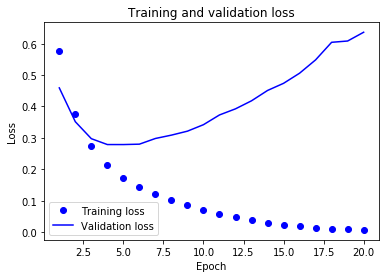

In [33]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')  # 'bo' = "blue dot"
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')  # 'b' = "solid blue line"
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

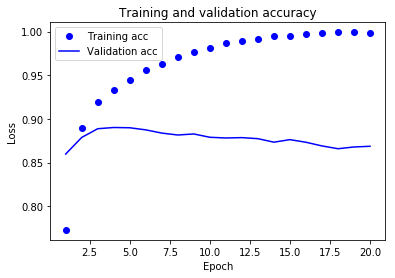

In [34]:
plt.clf()  # Clear Figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')  # 'bo' = "blue dot"
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')  # 'b' = "solid blue line"
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### Retraining the model from scratch
- Try changing activation type ('relu', 'tanh')
- Try changing the number of layers
- Tray changing the width of the layers (16, 32, 64)
- Tri changing the optimizer ('rmsprop', 'mse')

In [55]:
activation = 'relu'    # relu, tanh?
optimizer = 'rmsprop'  # 'rmsprop, mse?'
width = 4             # 4, 8, 16, 32, 64?
hidden_layers = 3      # 1, 2, 3?

model = models.Sequential()
model.add(layers.Dense(width, activation=activation, input_shape=(10000,)))  
for i in range(hidden_layers):
    model.add(layers.Dense(width, activation=activation))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(x_train, 
                    y_train,
                    epochs=10,  # 4
                    batch_size=512,
                    validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)
print("Evaluation results: {}".format(results))

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 4)                 40004     
_________________________________________________________________
dense_33 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_34 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_35 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 5         
Total params: 40,069
Trainable params: 40,069
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 10000 samples
Epoch 1/10
25000/25000 [==============================] - 6s 229u

[0.5222051197242736, 0.86224]

###### Redraw the graphs

In [56]:
history_dict = history.history
print("Keys {}".format(history_dict.keys()))

acc = history_dict['acc']

Keys dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


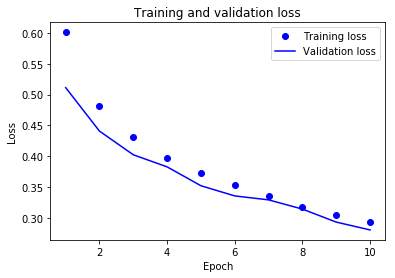

In [57]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')  # 'bo' = "blue dot"
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')  # 'b' = "solid blue line"
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

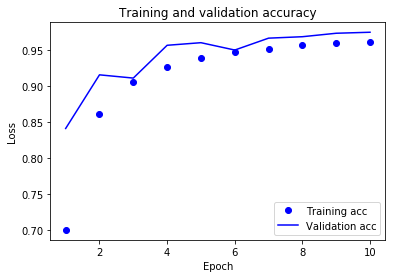

In [58]:
plt.clf()  # Clear Figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')  # 'bo' = "blue dot"
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')  # 'b' = "solid blue line"
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [61]:
prediction = model.predict(x_test)
print("Predictions:\n{}".format(prediction))

Predictions:
[[0.10889244]
 [0.6210218 ]
 [0.06134588]
 ...
 [0.01628008]
 [0.01807708]
 [0.49428973]]
